## Project Description
Projek yang akan dilakukan kali ini adalah menganalisis sebuah dataset London Crime LSOA pada tahun 2008 - 2016. Pada projek ini akan dilakukan visualisasi terhadap data serta menarik kesimpulan dari hasil visualisasi tersebut.

### Melakukan Persiapan dan Import Library yang Diperlukan

In [29]:
# Library untuk proses data
import pandas as pd
import numpy as np

# Library untuk mencari koordinat wilayah
from geopy.geocoders import Nominatim

# Library untuk membuat peta
import folium
from folium import plugins

# Library untuk plotting dan diagram
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Library untuk word cloud
from wordcloud import WordCloud

### Membaca Dataset Dan Memasukkan Dataset ke Data Frame (Data Loading)

In [30]:
# Membuat variabel untuk menyimpan dataset
df_london_crime = pd.read_csv('dataset/london_crime_by_lsoa.csv')

In [31]:
# Melakukan pengecekan pada isi dataset 10 teratas
df_london_crime.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [32]:
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Melakukan Perubahan Nama Pada Kolom Dataset

In [33]:
df_london_crime = df_london_crime.rename(
    columns={
        'lsoa_code' : 'Kode_LSOA',
        'borough' : 'Wilayah',
        'major_category' : 'Kategori_Besar',
        'minor_category' : 'Kategori_Kecil',
        'value' : 'Total',
        'year' : 'Tahun',
        'month' : 'Bulan'
    }
)

In [34]:
df_london_crime.head()

,Kode_LSOA,Wilayah,Kategori_Besar,Kategori_Kecil,Total,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Melakukan Pengecekan Missing Value pada Dataset

In [35]:
# Melihat apakah terdapat missing value pada setiap kolom pada dataset
df_london_crime.isnull().sum()

Kode_LSOA         0
Wilayah           0
Kategori_Besar    0
Kategori_Kecil    0
Total             0
Tahun             0
Bulan             0
dtype: int64

In [36]:
# Melakukan cek tipe data setiap kolom pada Dataset
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Kode_LSOA       object
 1   Wilayah         object
 2   Kategori_Besar  object
 3   Kategori_Kecil  object
 4   Total           int64 
 5   Tahun           int64 
 6   Bulan           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Tipe Data Sesuai dan Tidak ada Missing value
Pada dataset yang akan digunakan kali ini, yaitu dataset London Crime by LSOA Tipe data dengan data yang ada sudah sesuai serta tidak terdapat missing value didalamnya.
Maka tahap Pre-processing data sudah selesai dan bisa melanjutkan ke tahap berikutnya.

### Membuat Variabel Baru Berdasarkan Data

In [37]:
# Membuat Variabel List yang berisikan tahun pada data
years = list(map(int, np.sort(df_london_crime['Tahun'].unique())))

# Membuat Variabel List yang berisikan wilayah pada data
areas = list(df_london_crime['Wilayah'].unique())

# Membuat Variabel List yang berisikan kategori kejahatan besar pada data
major_categories = list(df_london_crime['Kategori_Besar'].unique())

# Membuat Variabel List yang berisikan kategori kejahatan kecil pada data
minor_categories = list(df_london_crime['Kategori_Kecil'].unique())

# Membuat Variabel List untuk setiap bulannya
months = list(range(1,13))

### Membuat Data Frame Berdasarkan Data Kategori Kejahatan Besar Per-tahun

In [38]:
data = {}
for year in years:
    # Mengambil semua data pada tahun, berdasarkan kolom Kategori_Besar dan menjumlahkan total kasus
    major_crime_years = df_london_crime[
        df_london_crime['Tahun'] == year
    ].groupby('Kategori_Besar')['Total'].sum()
    
    # Membuat Series untuk dataframe
    data[year] = pd.Series(
        data = map(int, major_crime_years.reset_index()['Total'].values),
        index = major_crime_years.index
    )

# Membuat dataframe berdasarkan 'Kategori Kejahatan Besar' sebagai index dan years sebagai columns
df_major_crime_years = pd.DataFrame(
    columns = years,
    index = major_categories,
    data = data
)
df_major_crime_years['Total Cases'] = df_major_crime_years[years].sum(axis=1)

# Mengurutkan data berdasarkan Total Case mulai dari yang terbanyak
df_major_crime_years.sort_values(by='Total Cases', ascending=False, inplace=True)

df_major_crime_years.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Cases
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


### Membuat Data Frame Berdasarkan Data Kategori Kejahatan Kecil Per-tahun

In [39]:
data = {}
for year in years:
    # Mengambil semua data pada tahun, berdasarkan kolom Kategori_Kecil dan menjumlahkan total kasus
    minor_crime_years = df_london_crime[
        df_london_crime['Tahun'] == year
    ].groupby('Kategori_Kecil')['Total'].sum()
    
    # Membuat Series untuk dataframe
    data[year] = pd.Series(
        data = map(int, minor_crime_years.reset_index()['Total'].values),
        index = minor_crime_years.index
    )

# Membuat dataframe berdasarkan 'Kategori Kejahatan Kecil' sebagai index dan years sebagai columns
df_minor_crime_years = pd.DataFrame(
    columns = years,
    index = minor_categories,
    data = data
)
df_minor_crime_years['Total Cases'] = df_minor_crime_years[years].sum(axis=1)

# Mengurutkan data berdasarkan Total Case mulai dari yang terbanyak
df_minor_crime_years.sort_values(by='Total Cases', ascending=False, inplace=True)

df_minor_crime_years.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Cases
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


### Membuat Data Frame Berdasarkan Data Total Kasus Untuk Setiap Wilayah Per-tahunnya

In [40]:
data = {}
for year in years:
    # Mengambil semua data pada tahun, berdasarkan kolom Wilayah dan menjumlahkan total kasus
    area_years = df_london_crime[
        df_london_crime['Tahun'] == year
    ].groupby('Wilayah')['Total'].sum()
    
    # Membuat Series untuk dataframe
    data[year] = pd.Series(
        data = map(int, area_years.reset_index()['Total'].values),
        index = area_years.index
    )

# Membuat dataframe berdasarkan 'Wilayah' sebagai index dan years sebagai columns
df_areas_crime_years = pd.DataFrame(
    columns = years,
    index = areas,
    data = data
)
df_areas_crime_years['Total Cases'] = df_areas_crime_years[years].sum(axis=1)

# Mengurutkan data berdasarkan Total Case mulai dari yang terbanyak
df_areas_crime_years.sort_values(by='Total Cases', ascending=False, inplace=True)

df_areas_crime_years.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Cases
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


### Membuat Data Frame Berdasarkan Data Total Kasus Untuk Setiap Tahun Per-bulannya

In [41]:
data = {}
for year in years:
    # Ambil semua data pada tahun = 'year', grouping berdasarkan 'Bulan', summing 'Jumlah Kasus'
    crime_year_month = df_london_crime[
        (df_london_crime['Tahun'] == year)
    ].groupby('Bulan')['Total'].sum()
    
    # menyiapkan Series untuk kebutuhan dataframe
    data[year] = pd.Series(
        data=map(int, crime_year_month.reset_index()['Total'].values),
        index=crime_year_month.index
    )

# Membuat dataframe dengan 'Month' sebagai index dan years sebagai columns
df_crime_year_month = pd.DataFrame(
    columns=years,
    index=range(1,13,1),
    data=data
)
df_crime_year_month['Total Cases'] = df_crime_year_month[years].sum(axis=1)

# Melakukan rename index nama bulan
months_name = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dict_index = {}
for i in range(1,13,1):
    dict_index[i] = months_name[i-1]
df_crime_year_month.rename(index=dict_index,inplace=True)

In [42]:
df_crime_year_month.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Cases
Jan,65419,59142,54934,57966,62436,58933,55515,57055,58847,530247
Feb,62626,54706,55069,54895,56735,55271,51222,53316,56697,500537
March,61343,63482,63629,61282,67537,57590,57669,60096,59167,551795
Apr,59640,59181,60085,58714,58801,55678,53467,56445,58637,520648
May,62587,62897,62126,62630,64344,56765,56327,61038,63990,552704


## Visualisasi Data

## Area Plot

#### Pertanyaan
Buatlah sebuah visualisasi dari 5 Kategori Kejahatan Kecil dengan jumlah total kasus terbanyak pada tahun 2008 - 2016

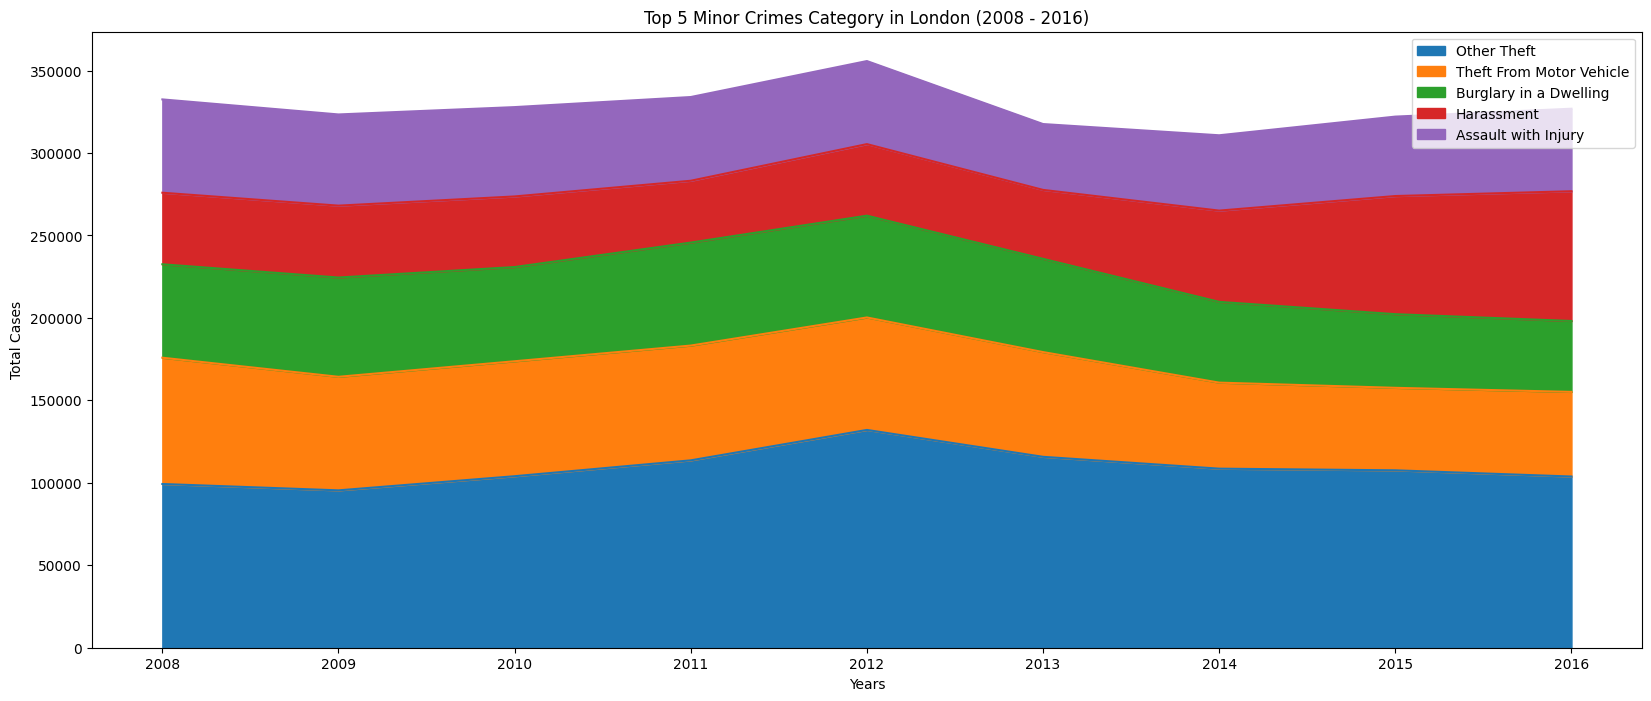

In [43]:
# Membuat Dataframe baru yang berisikan data 5 teratas dari dataframe kejahatan kecil per-tahun
df_top5_minor = df_minor_crime_years[:5][years].transpose()
df_top5_minor.plot(
    kind='area',
    stacked=True,
    figsize=(20,8)
)

plt.title('Top 5 Minor Crimes Category in London (2008 - 2016)')
plt.xlabel('Years')
plt.ylabel('Total Cases')
plt.legend(loc='upper right', fontsize=10)
plt.show()

#### Kesimpulan Visualisasi
1. Seperti yang terlihat pada Area Plot diatas, pada tahun pertama kelima jenis dari kategori kejahatan kecil mengalami penurunan, yaitu tahun 2008 ke 2009. Tren mulai terlihat meningkat untuk 3 tahun berikutnya yaitu dari tahun 2009 - 2012, dan kembali menurun hingga akhir tahun 2016 untuk jenis kejahatan Burglary in a Dwelling, Harassment, dan Assault with Injury. Sedangkan untuk jenis kejahatan Other Theft dan Theft From Motor Vehicle menurun untuk 2 tahun berikutnya yaitu 2012 - 2014, dan kembali mengalami peningkatan hingga akhir tahun 2016.

2. Puncak tahun yang mengalami total kasus terbanyak adalah tahun 2012 dengan jenis kejahatan Other Theft menjadi penyumbang total kasus terbanyak, dan Assault with Injury menjadi penyumbang yang paling sedikit dari kelima jenis kejahatan yang ada.


## Histogram

#### Pertanyaan
Buatlah visualisasi untuk melihat frekuensi kasus kejahatan yang terjadi di wilayah Kota London dari tahun 2008 - 2016

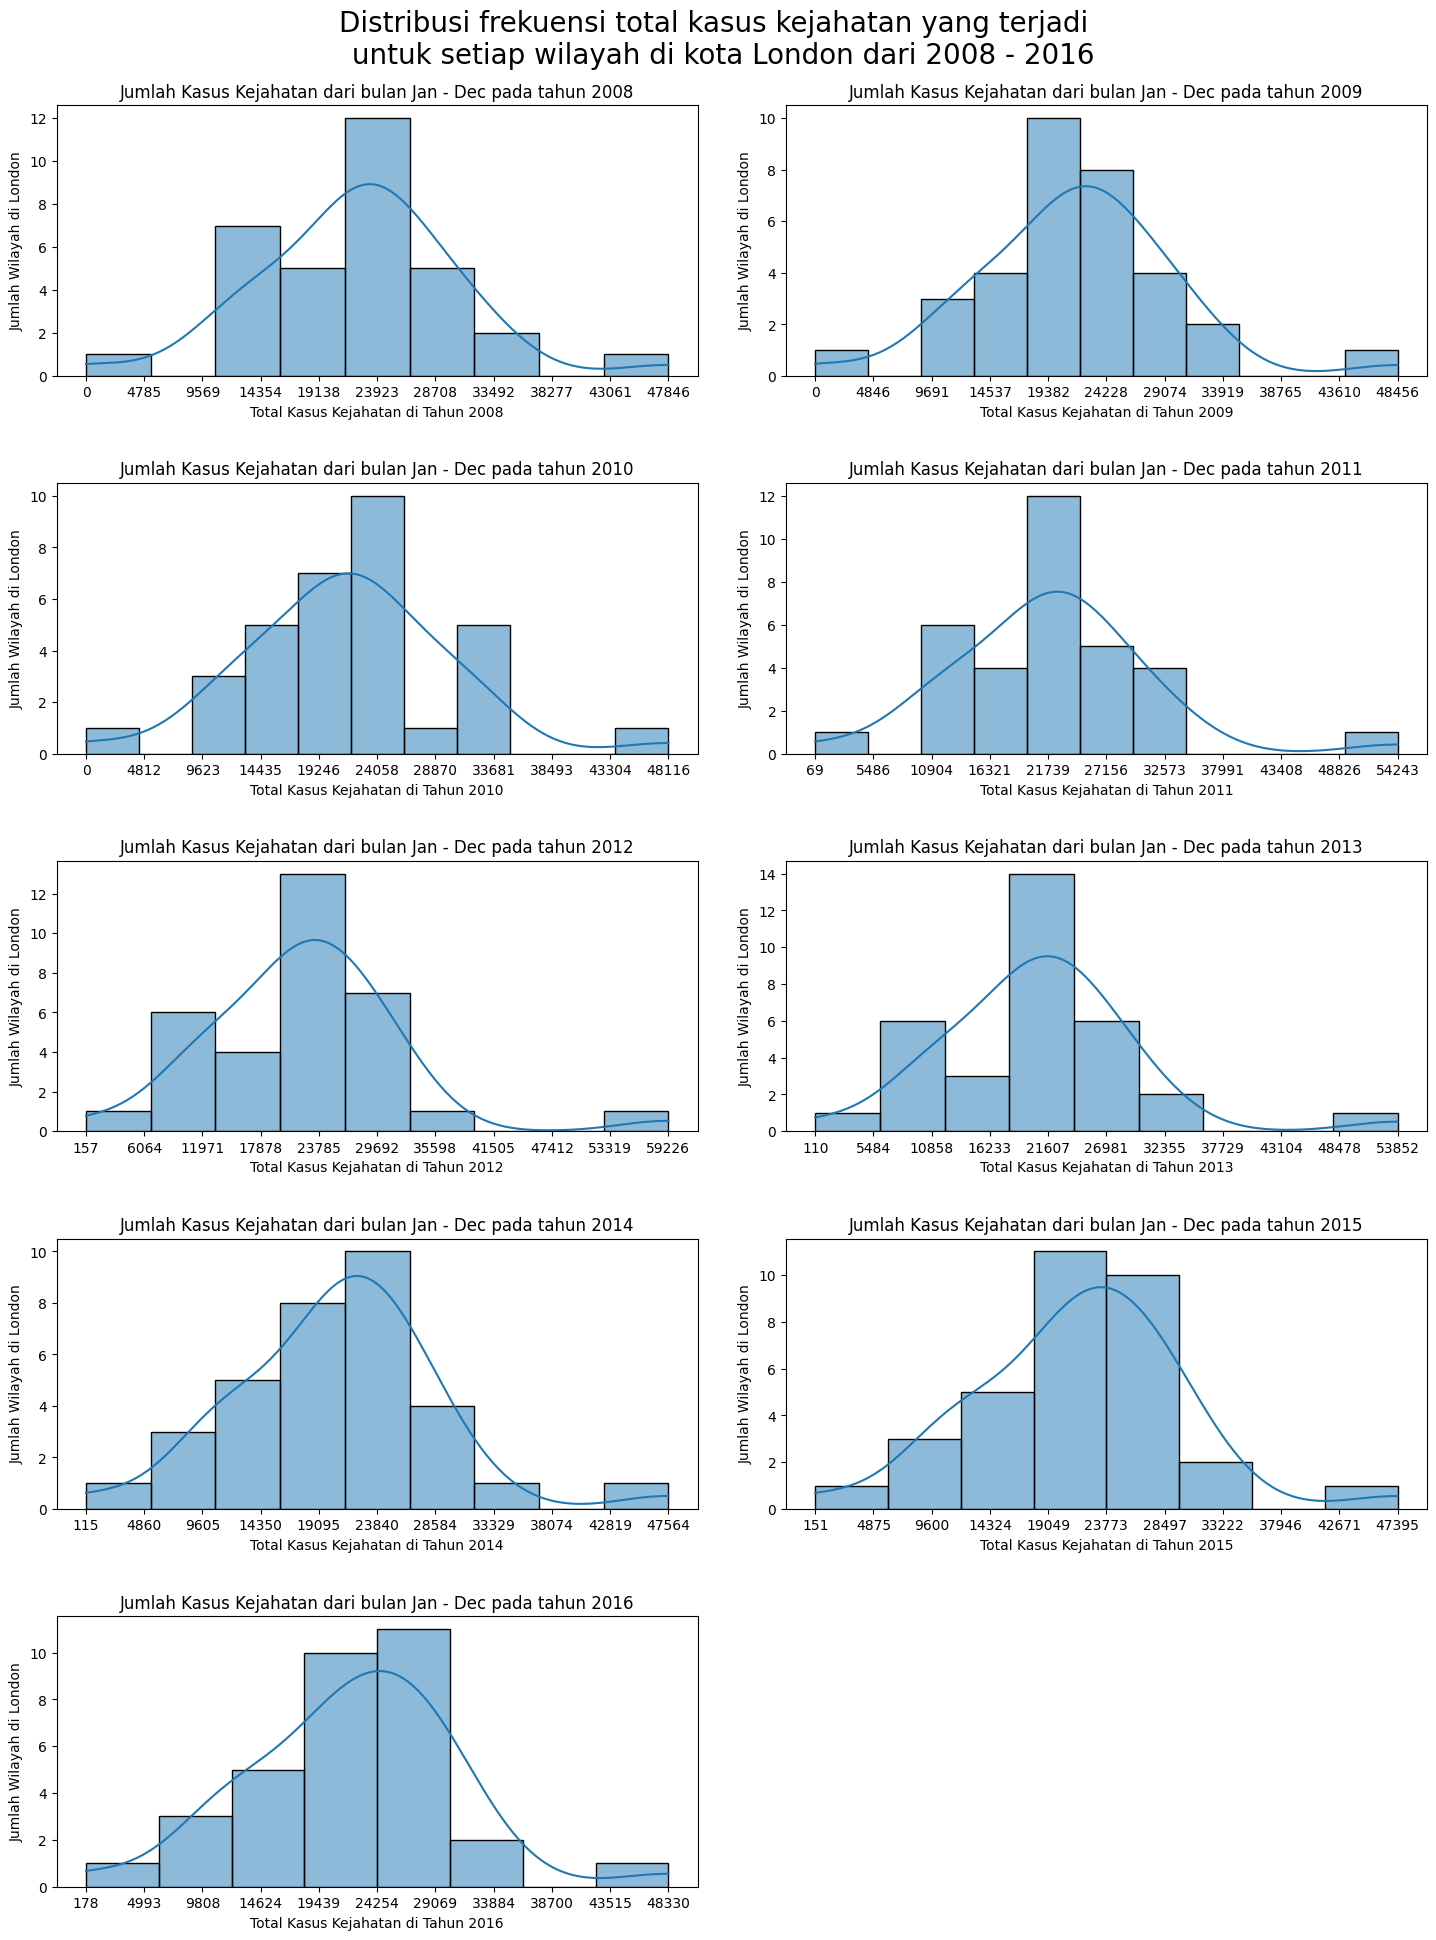

In [44]:
n_rows = int(len(years))
n_cols = 2

# Membuat figure untuk sub-plot
fig = plt.figure(figsize=(15, 35))

# Variabel untuk menamput ax setiap sub-plot
ax_s = []

plot_number = 1

for tahun in years:
    # hitung bin_edges dari setiap kategori 
    count, bin_edges = np.histogram(df_areas_crime_years[years][tahun])
    
    # subplot histogram
    ax_s.append(fig.add_subplot(n_rows, n_cols, plot_number))
    sns.histplot(df_areas_crime_years[years][tahun],kde=True, ax=ax_s[plot_number-1])
    ax_s[plot_number -
         1].set_title('Jumlah Kasus Kejahatan dari bulan Jan - Dec pada tahun '+str(tahun))
    ax_s[plot_number-1].set(xlabel = "Total Kasus Kejahatan di Tahun "+str(tahun), ylabel = "Jumlah Wilayah di London")
    
    # mengatur nilai pada sumbu x dengan masing-masing bin_edges
    ax_s[plot_number-1].set_xticks(bin_edges)
    
    plot_number += 1

fig.suptitle("Distribusi frekuensi total kasus kejahatan yang terjadi \n untuk setiap wilayah di kota London dari 2008 - 2016", fontsize=20)

# Memberikan padding untuk setiap sub-plot
fig.tight_layout(pad=3.0)

plt.show()

#### Kesimpulan dari Visualisasi
1. Berdasarkan visualisasi diatas seluruh grafik yang ada berbentuk bell-curved, yang artinya distribusi normal.

2. Pada tahun 2013, jumlah wilayah yang terlibat tercatat paling banyak yaitu 14 wilayah, dengan total kasus kejahatan yang terjadi sebanyak 53825

### Box Plot

#### Pertanyaan
Buatlah visualisasi statistik dari total kasus kejahatan yang terjadi untuk setiap wilayah per-tahunnya

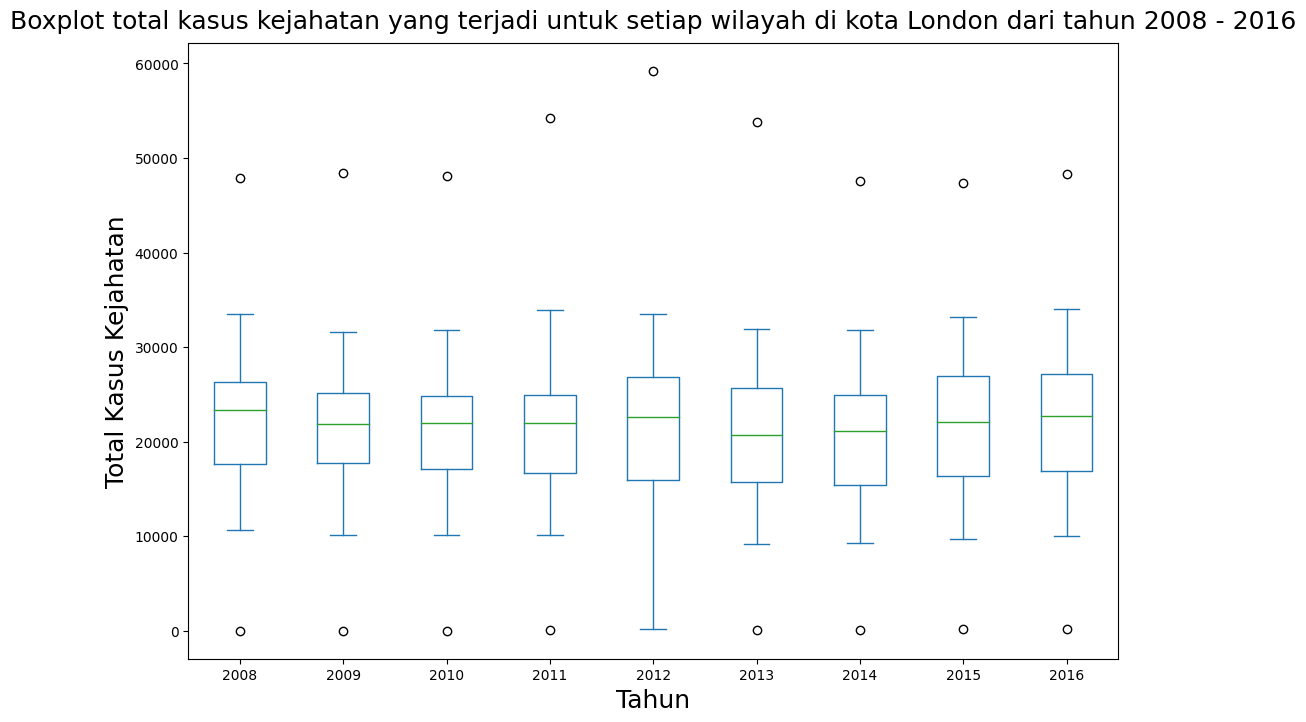

In [45]:
df_areas_crime_years[years].plot(
    kind='box',
    figsize=(12,8),
)
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Total Kasus Kejahatan', fontsize=18)
plt.title('Boxplot total kasus kejahatan yang terjadi untuk setiap wilayah di kota London dari tahun 2008 - 2016',  fontsize=18, y=1.01)
plt.show()

#### Kesimpulan dari Visualisasi
1. Grafik diatas menunjukkan bahwa rata-rata total kasus yang terjadi pertahunnya berada di sekitar angka 24000.

2. Range terbesar untuk seluruh total kasus kejahatan yang terjadi per-tahunnya berada pada tahun 2012.

## Bar & Pie Chart

#### Pertanyaan
Buatlah visualisasi yang menggambarkan frekuensi serta presentase Kejahatan Kategori Besar yang terjadi di Kota London dari tahun 2008 - 2016

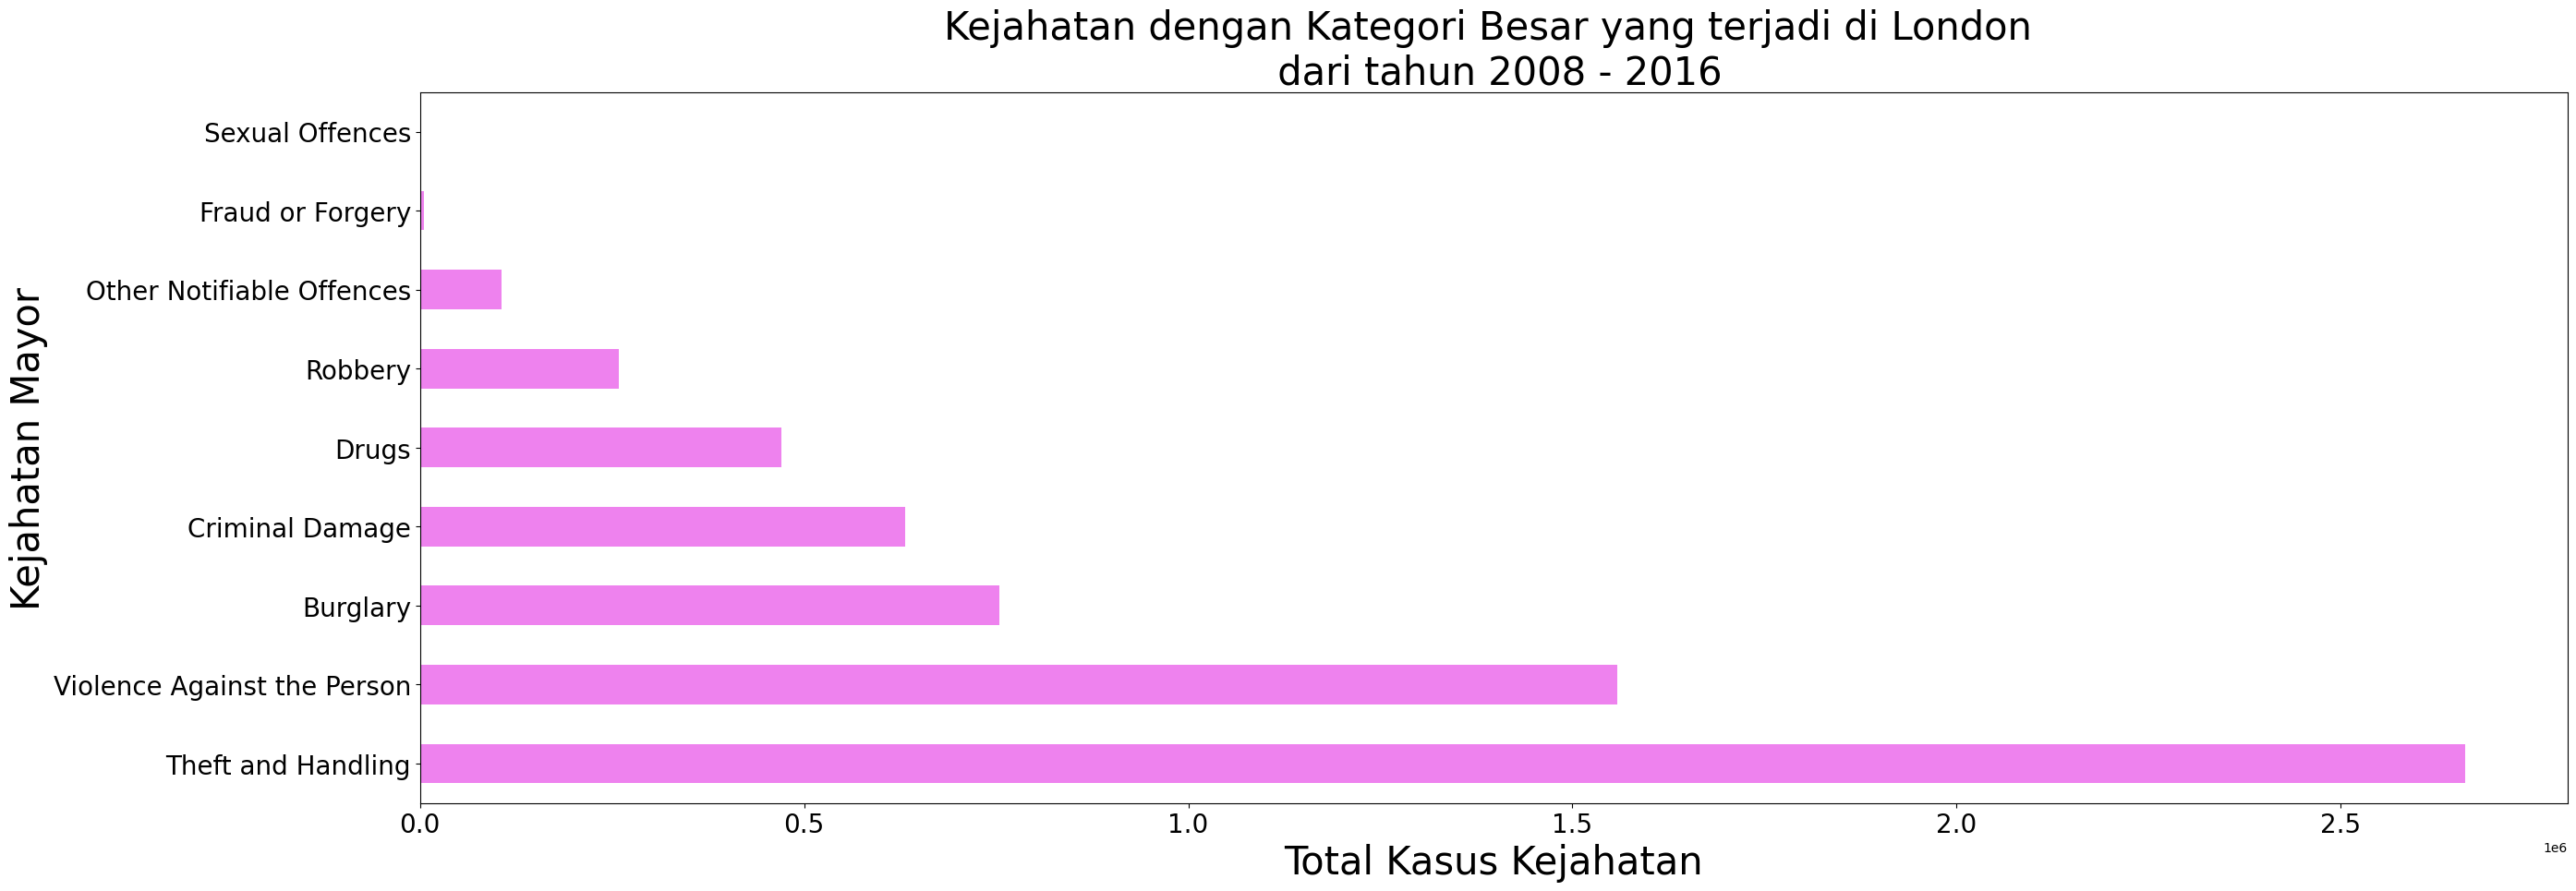

In [46]:
df_major_crime_years['Total Cases'].plot(
    kind='barh', 
    figsize=(30,10),
    color='violet'
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Kejahatan dengan Kategori Besar yang terjadi di London \n dari tahun 2008 - 2016', fontsize=30)
plt.xlabel('Total Kasus Kejahatan', fontsize=30)
plt.ylabel('Kejahatan Mayor', fontsize=30)
plt.show()


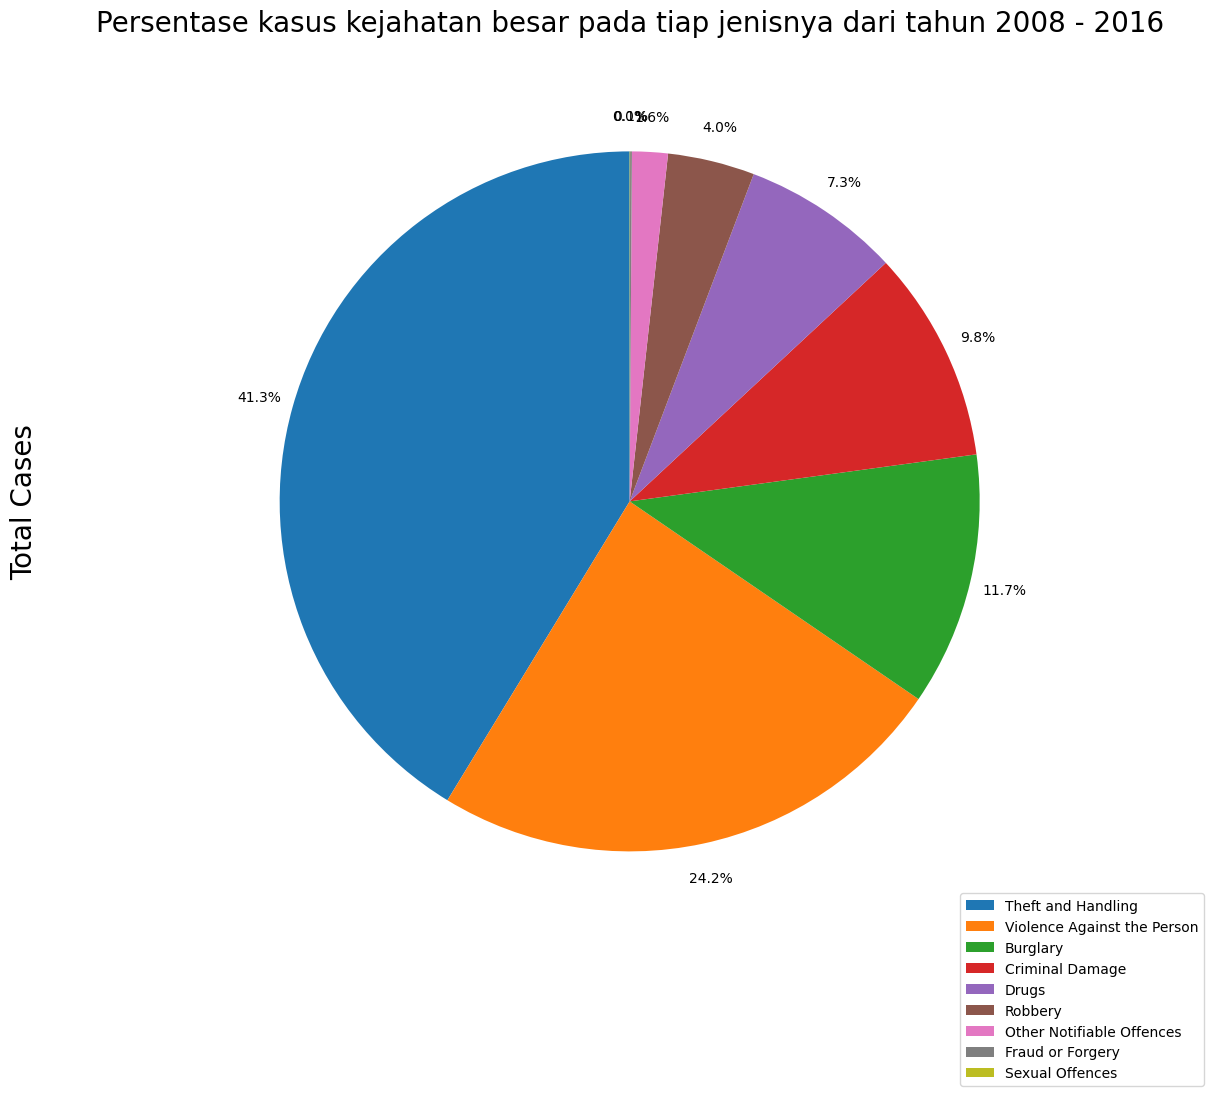

In [47]:
df_total_major = df_major_crime_years['Total Cases']
df_total_major.plot(kind='pie',
            figsize=(15, 10),
            autopct='%1.1f%%',
            startangle=90,
            labels=None,
            pctdistance=1.1,
            )

plt.title('Persentase kasus kejahatan besar pada tiap jenisnya dari tahun 2008 - 2016', y=1.1, fontsize=20)
plt.ylabel('Total Cases',fontsize=20)
plt.axis('equal')

plt.legend(labels=df_total_major.index.values, bbox_to_anchor=(1, 0))

plt.show()

#### Kesimpulan Visualisasi
1. Pada Kategori Kejahatan Besar yang terjadi di Kota London pada tahun 2008 - 2016, terdapat berbagai macam jenis kejahatan, yaitu Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, Drugs, Robbery, Other Notifiable Offences, Fraud or Forgery dan, Sexual Offences.

2. Selama rentang waktu 8 tahun dari ke-9 jenis kejahatan yang tercatat pada data, Theft and Handling menjadi kejahatan yang memiliki total kasus paling banyak dengan presentase 41.3%, sedangkan kejahatan jenis Sexual Offences menjadi jenis kejahatan dengan total kasus paling sedikit yaitu 0.0%.

## Line Chart

#### Pertanyaan
BUatlah visualisasi total kasus kejahatan yang terjadi di kota london dari tahun 2008 - 2016 per bulannya

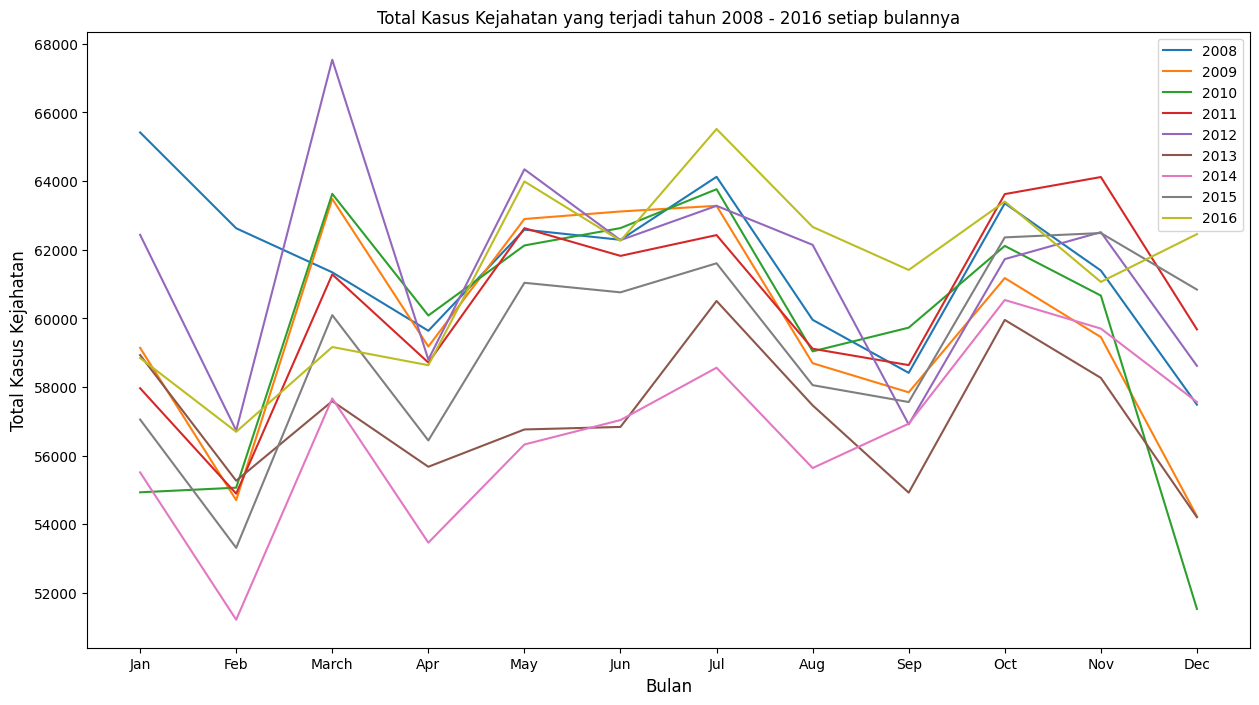

In [48]:
ax = df_crime_year_month[years].plot(figsize=(15,8))
ax.set_xticks(range(0,12))
ax.set_xticklabels(months_name)
ax.legend(loc='upper right')
ax.set_ylabel('Total Kasus Kejahatan', fontsize=12)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_title('Total Kasus Kejahatan yang terjadi tahun 2008 - 2016 setiap bulannya', fontsize=12)
plt.show()

#### Kesimpulan Visualisasi
1. Berdasarkan visualisasi diatas, terjadi peningkatan terhadap total kasus kejahatan pada bulan maret setiap tahunnya, namun kembali mengalami penurunan di bulan berikutnya.

2. Puncak total kasus kejahatan paling banyak terjadi pada Maret 2012, sedangkan yang terrendah yaitu pada Februari 2014.

3. Kejahatan mengalami penurunan di setiap akhir tahun atau bulan desember, kecuali untuk tahun 2016 yang mengalami kenaikan total kasus pada akhir tahunnya.

### Word Cloud

#### Buatlah sebuah word cloud untuk kategori kejahatan kecil pada tahun 2012

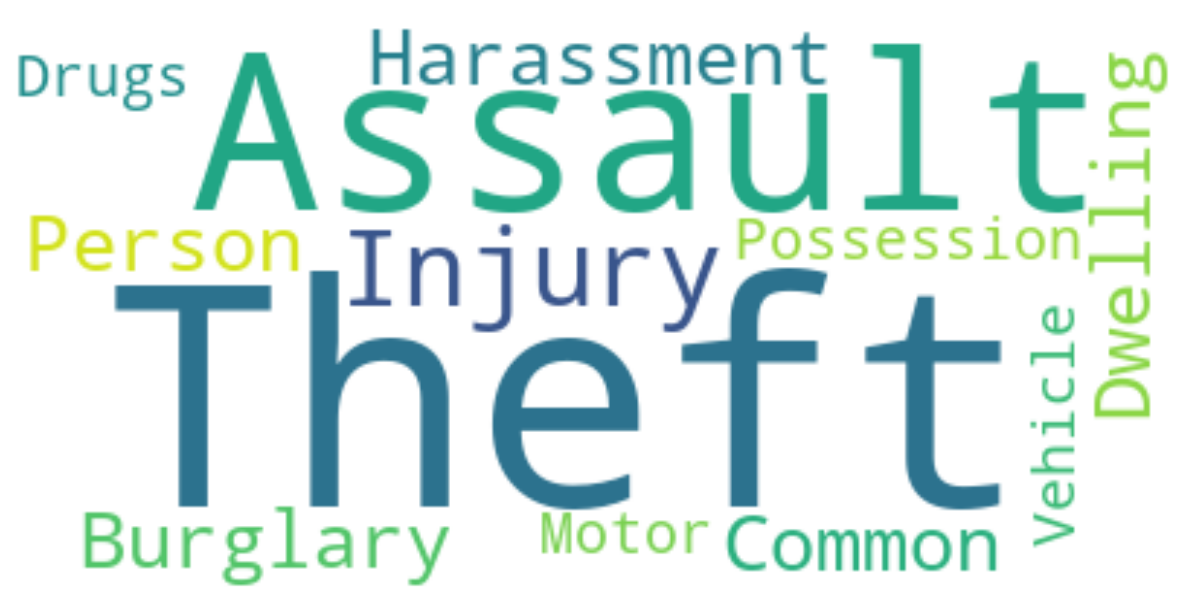

In [49]:
# Membuat dataframe terpisah untuk wordcloud
df_wc_12 = df_london_crime[
    df_london_crime['Tahun']==2012
][['Kategori_Kecil','Total']]

# Menjumlahkan total case kategori kejahatan kecil dan total case
df_wc_12 = df_wc_12.groupby('Kategori_Kecil').sum()
df_wc_12.index.name = None
total_case = df_wc_12['Total'].sum()

# Inisialisasi variabel, dan menetapkan maksimum kata
word_string = ''
max_words = 20

# Melakukan untuk setiap jenis yang ada
for crime_cat in df_wc_12.index.values:
    repeat_num_crime_cat = int(
        df_wc_12.loc[crime_cat, 'Total']/float(total_case)*max_words)
    word_string = word_string + ((crime_cat + ' ') * repeat_num_crime_cat)

min_crime_category_wc = WordCloud(
    background_color='white'
)
min_crime_category_wc.generate(word_string)

fig = plt.figure() #buat figure
fig.set_figwidth(15) #setting lebar figure
fig.set_figheight(18) #setting tinggi figure

# Menampilkan wordcloud ke layar
plt.imshow(min_crime_category_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Folium Map

#### Buatlah visualisasi dari peta london

In [50]:
# Mengatur koordinat Kota London
london_lattitude = 51.509865
london_longitude = -0.118092

# Instansiasi objek Folium.Map
london_map = folium.Map(
    location=[london_lattitude, london_longitude],
)

# display London Map
london_map

### Overall Analysis
Informasi yang berhasil ditemukan setelah melakukan visualisasi data:

1. Selama rentang waktu 8 tahun dari ke-9 jenis kejahatan yang tercatat pada data, Theft and Handling menjadi kejahatan yang memiliki total kasus paling banyak dengan presentase 41.3% dari keseluruhan total kasus yang tercatat pada data.

2. Pada bulan maret untuk setiap tahunnya selalu mengalami peningkatan total kasus kejahatan, sedangkan pada akhir tahun total kasus kejahatan mengalami penurunan.

3. Puncak tahun yang mengalami total kasus terbanyak adalah tahun 2012 dengan jenis kejahatan Other Theft menjadi penyumbang total kasus terbanyak